<a href="https://colab.research.google.com/github/QuanhH6501/AI/blob/main/DangQuangAnh20192678.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import torch
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive
linear_data = pd.read_csv('data_linear.csv')

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
# .iloc <=> Extract Data from DataFrame to Series
# values <=> Convert data from Series to 1D Numpy array
# reshape(-1,1) <=> Convert 1D Numpy Array to 2D numpy array, 1: number of column, -1: number of row (automatic calculate from number of elements)
X_linear = linear_data.iloc[:,0].values.reshape(-1,1)
y_linear = linear_data.iloc[:,1].values.reshape(-1,1)

In [ ]:
# Normalize Data
X_linear=MinMaxScaler().fit_transform(X_linear)
y_linear=MinMaxScaler().fit_transform(y_linear)

Text(0, 0.5, 'giá/100')

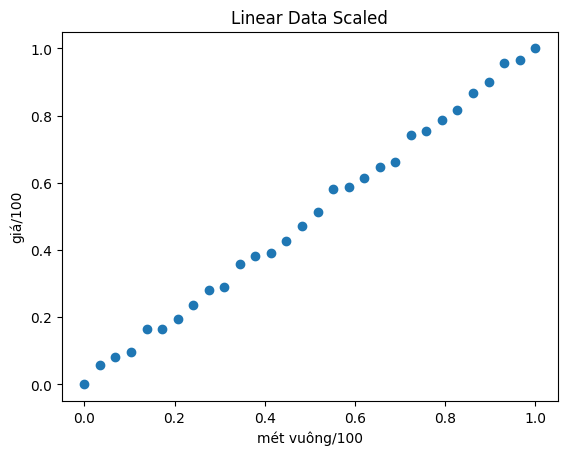

In [ ]:
#Visualize Scaled Data
plt.scatter(X_linear, y_linear)
plt.title('Linear Data Scaled')
plt.xlabel('mét vuông/100')
plt.ylabel('giá/100')

In [11]:
#Gợi ý:
#- Viết code tính hàm loss function
#- Viết code tính gradient descent
#- Viết code tính giá trị model dự đoán được
# Có thể tham khảo tại Assignment HW1 đã làm

In [12]:
X_linear = MinMaxScaler().fit_transform(X_linear)
y_linear = MinMaxScaler().fit_transform(y_linear)

In [13]:
X_linear_bias = np.c_[np.ones((X_linear.shape[0], 1)), X_linear]

In [29]:
theta = np.zeros((X_linear_bias.shape[1], 1))
learning_rate = 0.01
iterations = 5000

In [30]:
# Gradient Descent
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost


In [31]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for iteration in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta = theta - learning_rate * gradient
        cost_history[iteration] = compute_cost(X, y, theta)

    return theta, cost_history

In [32]:
theta, cost_history = gradient_descent(X_linear_bias, y_linear, theta, learning_rate, iterations)

In [33]:
print("Learned Parameters (theta):", theta)

Learned Parameters (theta): [[0.01312298]
 [0.97503861]]


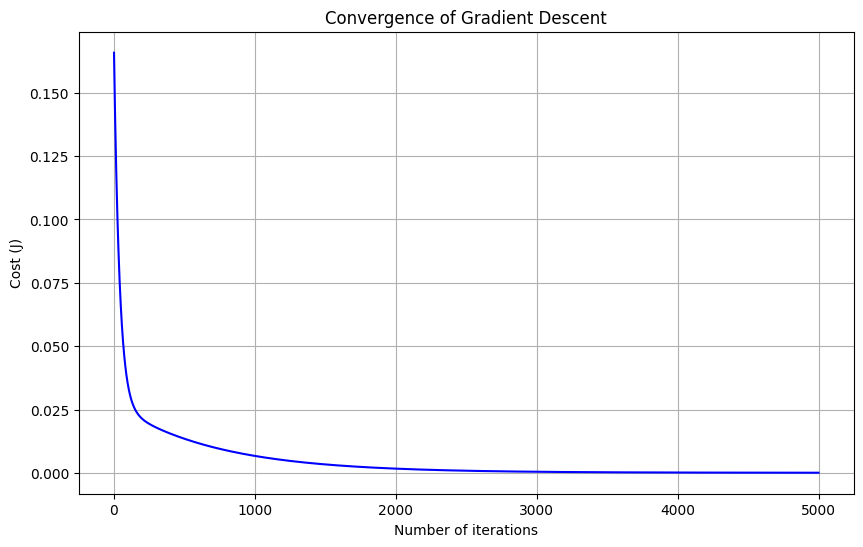

In [34]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')
plt.show()

In [35]:
def predict(X, theta):
    return X.dot(theta)

In [36]:
predictions = predict(X_linear_bias, theta)

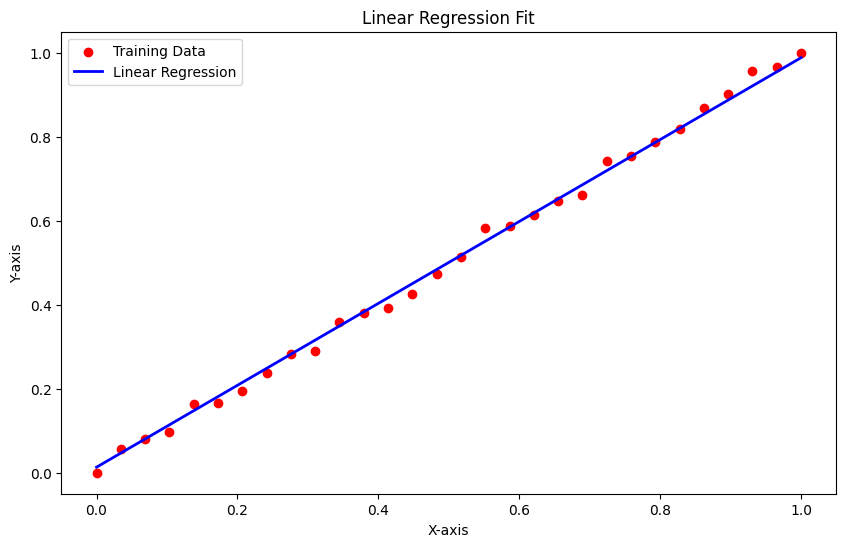

In [37]:
plt.scatter(X_linear, y_linear, color='red', marker='o', label='Training Data')
plt.plot(X_linear, predictions, color='blue', linewidth=2, label='Linear Regression')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()